Torchvisoin

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from  torch.utils.data import DataLoader, Dataset 
import torchvision

import numpy as np
import matplotlib.pyplot as plt

In [11]:
# # python
# import torch
# print(f'PyTorch version: {torch.__version__}')
# import torchaudio
# print(f'Torchaudio version: {torchaudio.__version__}')
# import torchvision
# print(f'Torchvision version: {torchvision.__version__}')
# print(f'CPU device: {torch.device("cpu")}')
# print(f'CPU device count: {torch.get_num_threads()}')
# print(f'CUDA available: {torch.cuda.is_available()}')
# print(f'CUDA version: {torch.version.cuda}')
# print(f'CUDA device: {torch.cuda.get_device_name()}')
# print(f'CUDA device count: {torch.cuda.device_count()}')
# print(f'CUDA device index: {torch.cuda.current_device()}')
# print(f'CUDA device prop: {torch.cuda.get_device_properties(0)}')
# print(f'CUDA Space: {torch.cuda.get_device_properties(0).total_memory/1024**3} GB')  

In [12]:
# set_dev = 'cuda' if torch.cuda.is_available() else 'cpu'
# set_dev
# device = torch.device(set_dev)
# print(f'Using device: {device}')

In [13]:
dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
type(dataset)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



torchvision.datasets.mnist.MNIST

In [16]:
X = dataset.data
type(X), X.shape , X.dtype

(torch.Tensor, torch.Size([60000, 28, 28]), torch.uint8)

In [17]:
y = dataset.targets
type(y), y.shape, y.dtype

(torch.Tensor, torch.Size([60000]), torch.int64)

In [18]:
X.shape, y.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"  # Options: 'last', 'all', 'last_expr'

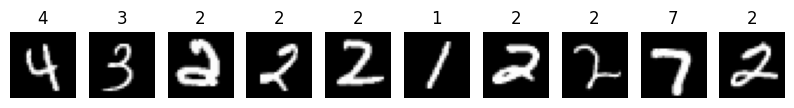

In [38]:
plt.figure(figsize=(10,10))
for i in range(10):
    img_idx = np.random.randint(0, X.shape[0])
    plt.subplot(1,10,i+1)
    plt.imshow(X[img_idx], cmap='gray')
    plt.axis('off')
    plt.title(y[img_idx].item())
plt.show()


In [44]:
def softmax(x):
    e = np.exp(x)
    return e / np.sum(e)

x = np.random.randn(5)
y = softmax(x)
x,y

(array([-1.07248521, -0.9017672 , -2.19361664, -0.21523239,  1.87780389]),
 array([0.04170103, 0.04946394, 0.01359082, 0.09827588, 0.79696833]))

In [47]:
sum(x), sum(y)

(-2.505297547772792, 1.0)

In [51]:
x = torch.randn(5)
y = x.softmax(0)
z = x.sigmoid()
x,y,z, x.sum() ,y.sum(), z.sum()

(tensor([-0.9776,  0.4053, -0.3187,  1.2715,  0.0788]),
 tensor([0.0519, 0.2068, 0.1003, 0.4918, 0.1492]),
 tensor([0.2734, 0.6000, 0.4210, 0.7810, 0.5197]),
 tensor(0.4593),
 tensor(1.0000),
 tensor(2.5950))

In [63]:
# CROSS ENTROPY LOSS
def cross_entropy(y_hat, y):
    loss = -np.sum(y * np.log(y_hat)) 
    return loss

y = np.array([0, 0, 1, 0, 0])
y_hat = np.array([0.1, 0.1, 0.89, 0.1, 0.1])
cross_entropy(y_hat, y)

0.11653381625595151

In [62]:
y_hat2 = np.array([1.0, 0.70001, 0.20999, 0.735435, 0.634])
cross_entropy(y_hat2, y)

1.5606953684461102

In [61]:
loss = nn.CrossEntropyLoss() 

tensor(1.8288, dtype=torch.float64)